In [116]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [130]:
dir = "p_date=2023-01-04-15_24_55"

In [139]:
path = f'../../output/weights/{dir}/log.json'
#path = "C:/Users/elias/OneDrive/Desktop/log.json"

with open(path, 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

66001 records
dict_keys(['loss', 'mae', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [140]:
slice = 100_000

# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-slice:]
mean_loss = stat.mean(loss) + 100000
loss_filtered = { k: v for k, v in enumerate(loss) if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-slice:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ][-slice:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"][-slice:]) if str(v) != "nan" }

In [133]:
def plot(data, title, labelX, labelY):
    interval = 1000
    interval_min_max = 1_000
    
    
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : round(stat.mean(list(data.values())[i:i+interval+1]), 1) for i in range(0, len(data.values()), interval) }
    min_line = { i + index_0 : round(min(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    max_line = { i + index_0 : round(max(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.plot(list(min_line.keys()), list(min_line.values()), color="orange")
    plt.plot(list(max_line.keys()), list(max_line.values()), color="orange")
    plt.hlines(y=0, xmin=0, xmax=max(data.keys()), linewidth=2, color='purple')
    
    plt.title(title)
    
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    #print(f"Moving Average (simple): {moving_average}")
    print()
    #print(f"Moving Average: {percent_list}")
    print("Values: " + " > ".join(map(str, moving_average.values())))
    print()
    
    print(f"Minimum (last {interval}): {min(list(data.values())[:-interval])}")
    print(f"Average (last {interval}): {np.mean(list(data.values())[:-interval])}")
    print(f"Maximum (last {interval}): {max(list(data.values())[:-interval])}")

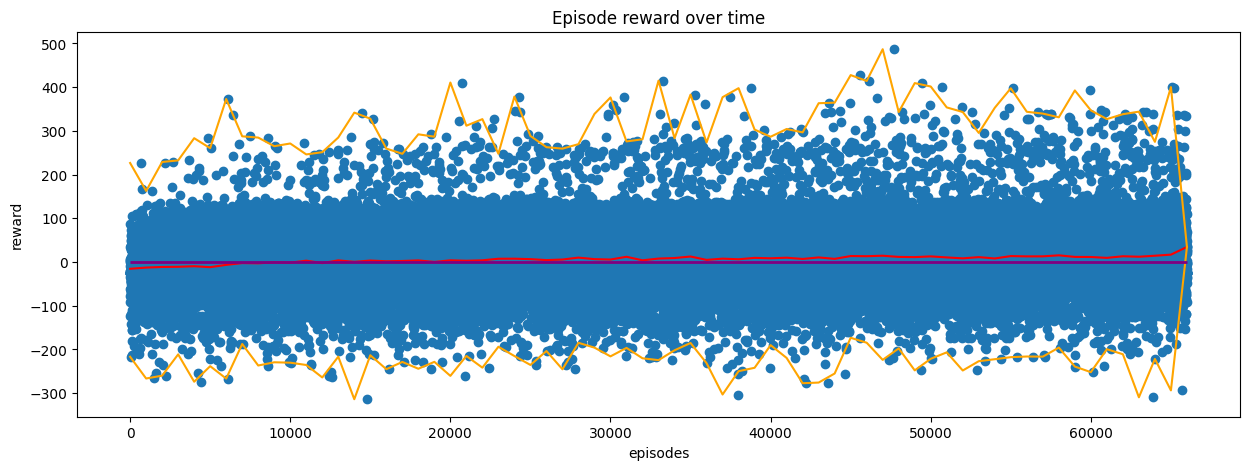

Maximum: 486.7
Average: 5.626467023227156

Values: -15.5 > -12.7 > -11.3 > -10.9 > -9.6 > -11.8 > -6.5 > -2.4 > -2.9 > -0.7 > -1.5 > 3.1 > -2.5 > 3.8 > 0.4 > 3.4 > 1.7 > 2.4 > 3.7 > 0.2 > 3.9 > 2.9 > 3.9 > 7.5 > 7.6 > 6.6 > 4.4 > 5.7 > 10.1 > 6.6 > 5.7 > 12.0 > 3.9 > 7.9 > 9.1 > 12.6 > 4.9 > 7.7 > 6.3 > 9.5 > 8.5 > 9.9 > 7.0 > 10.5 > 7.2 > 13.7 > 13.3 > 14.4 > 11.7 > 11.2 > 12.9 > 10.5 > 8.4 > 11.2 > 8.1 > 13.6 > 12.9 > 13.0 > 15.3 > 11.7 > 11.5 > 9.5 > 13.2 > 12.1 > 14.4 > 16.9 > 34.4

Minimum (last 1000): -313.8
Average (last 1000): 5.453419178166484
Maximum (last 1000): 486.7


In [141]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

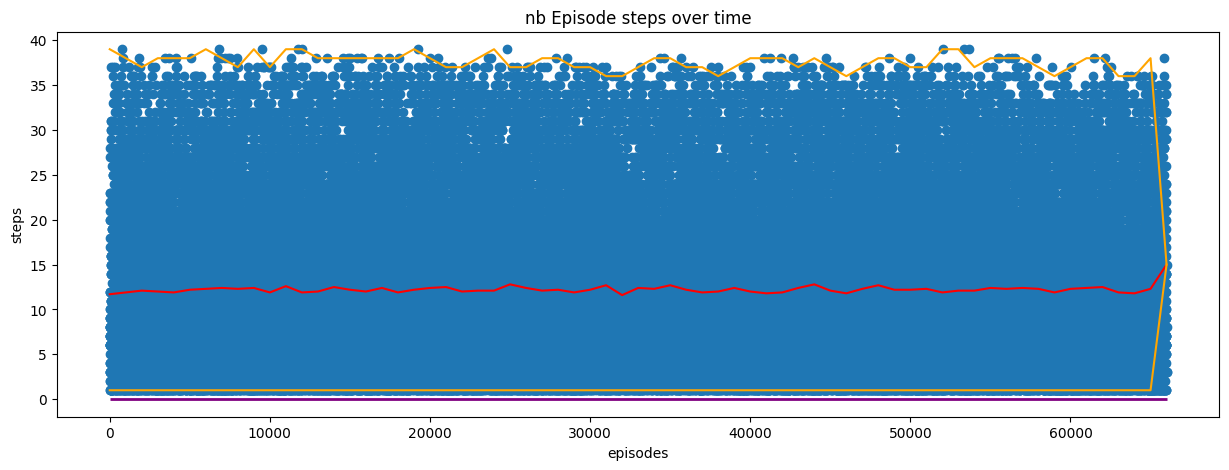

Maximum: 39
Average: 12.19349706822624

Values: 11.7 > 11.9 > 12.1 > 12.0 > 11.9 > 12.2 > 12.3 > 12.4 > 12.3 > 12.4 > 11.9 > 12.6 > 11.9 > 12.0 > 12.5 > 12.2 > 12.0 > 12.4 > 11.9 > 12.2 > 12.4 > 12.5 > 12.0 > 12.1 > 12.1 > 12.8 > 12.4 > 12.1 > 12.2 > 11.9 > 12.2 > 12.7 > 11.6 > 12.4 > 12.3 > 12.7 > 12.2 > 11.9 > 12.0 > 12.4 > 12.0 > 11.8 > 11.9 > 12.4 > 12.8 > 12.1 > 11.8 > 12.3 > 12.7 > 12.2 > 12.2 > 12.3 > 11.9 > 12.1 > 12.1 > 12.4 > 12.3 > 12.4 > 12.3 > 11.9 > 12.3 > 12.4 > 12.5 > 11.9 > 11.8 > 12.3 > 15

Minimum (last 1000): 1
Average (last 1000): 12.192150889986308
Maximum (last 1000): 39


In [142]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

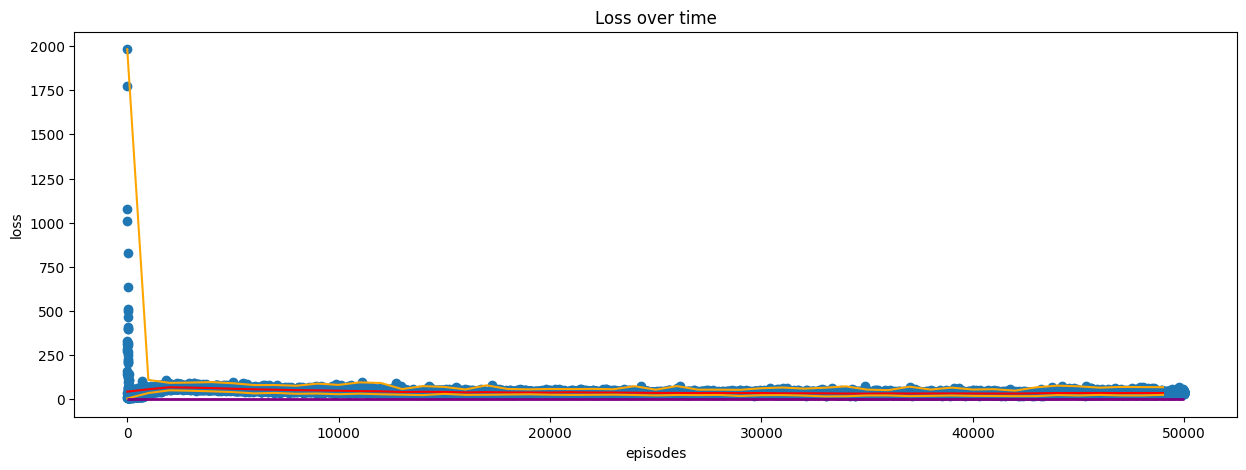

Maximum: 1982.3076171875
Average: 40.443036554059724

Values: 42.8 > 56.4 > 67.7 > 65.6 > 63.2 > 59.4 > 56.0 > 53.8 > 51.4 > 50.1 > 48.2 > 45.9 > 44.7 > 41.0 > 42.1 > 41.3 > 38.5 > 40.0 > 38.3 > 38.1 > 37.6 > 39.6 > 37.9 > 37.8 > 36.9 > 35.8 > 35.7 > 35.1 > 35.5 > 34.7 > 35.1 > 33.4 > 33.6 > 33.3 > 32.1 > 31.7 > 33.0 > 32.3 > 32.6 > 32.8 > 32.4 > 32.4 > 32.0 > 33.6 > 34.9 > 35.3 > 35.2 > 35.1 > 35.3 > 35.0

Minimum (last 1000): 4.281849384307861
Average (last 1000): 40.55304988700575
Maximum (last 1000): 1982.3076171875


In [136]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

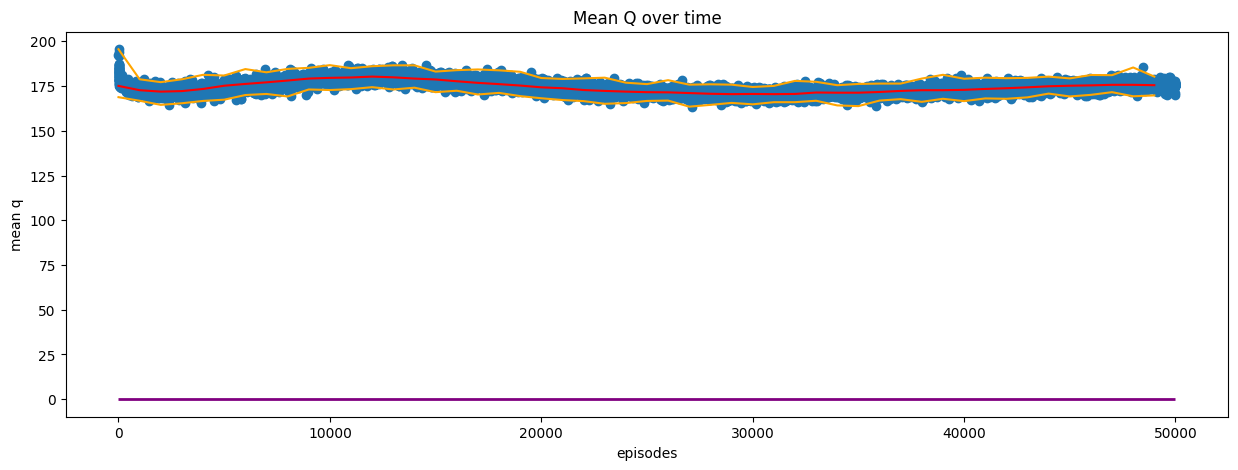

Maximum: 195.59487915039062
Average: 174.338422812886

Values: 175.1 > 172.7 > 171.9 > 172.2 > 173.4 > 175.2 > 176.2 > 177.1 > 178.1 > 179.2 > 179.6 > 179.8 > 180.3 > 179.9 > 179.2 > 178.7 > 177.7 > 176.8 > 176.1 > 175.3 > 174.3 > 173.8 > 172.8 > 172.3 > 171.9 > 171.6 > 171.5 > 171.1 > 170.7 > 170.5 > 170.6 > 170.5 > 170.6 > 171.4 > 171.3 > 171.3 > 171.7 > 172.3 > 172.7 > 172.7 > 172.9 > 173.4 > 173.8 > 174.3 > 174.9 > 175.2 > 175.4 > 175.7 > 175.7 > 175.5

Minimum (last 1000): 163.51573181152344
Average (last 1000): 174.31453753948387
Maximum (last 1000): 195.59487915039062


In [137]:
plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

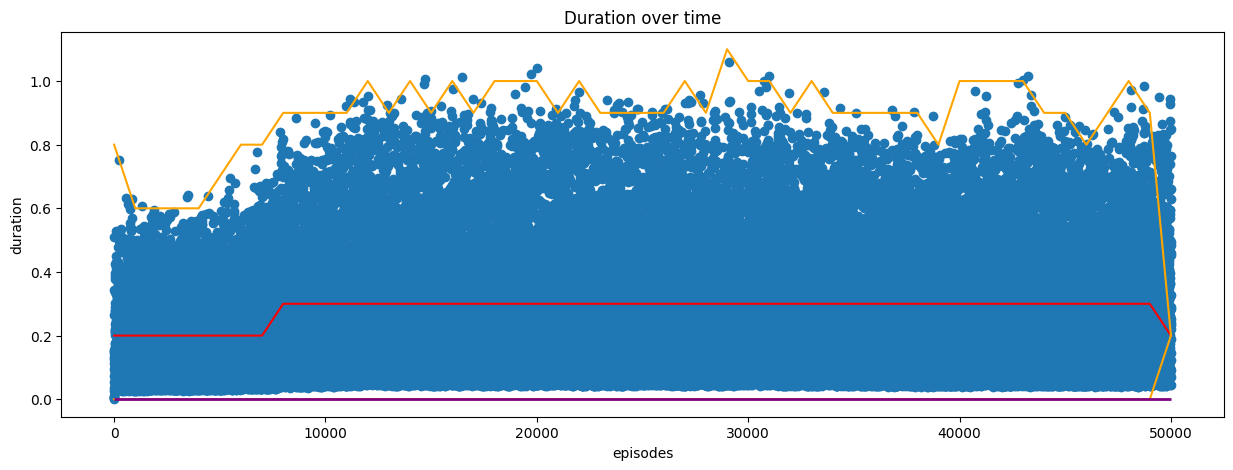

Maximum: 1.0594177999992098
Average: 0.2829433123137521

Values: 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.3 > 0.2

Minimum (last 1000): 0.0016775999999998348
Average (last 1000): 0.28265312943205095
Maximum (last 1000): 1.0594177999992098


In [138]:
plot(duration, "Duration over time", "episodes", "duration")